In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import chain

In [53]:
from utils.light_gcn_utils import build_user_item_interactions, get_positive_negative_ratings

In [3]:
user_columns = ['userid', 'gender', 'age', 'occupation', 'zipcode']
movie_columns = ['movieid', 'title', 'genres']
rating_columns = ['userid', 'movieid', 'rating', 'timestamp']
users = pd.read_csv('ml-1m/users.dat', sep='::', header=None, names=user_columns, engine='python', encoding='ISO-8859-1')
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='ISO-8859-1')
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=rating_columns, engine='python', encoding='ISO-8859-1')

In [8]:
occupation_dict = {
        0: "other",
        1: "academic/educator",
        2: "artist",
        3: "clerical/admin",
        4: "college/grad student",
        5: "customer service",
        6: "doctor/health care",
        7: "executive/managerial",
        8: "farmer",
        9: "homemaker",
        10: "K-12 student",
        11: "lawyer",
        12: "programmer",
        13: "retired",
        14: "sales/marketing",
        15: "scientist",
        16: "self-employed",
        17: "technician/engineer",
        18: "tradesman/craftsman",
        19: "unemployed",
        20: "writer"
    }

In [80]:
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [47]:
movies["genre_list"] = movies["genres"].apply(lambda x: x.split("|"))

In [38]:
flattened_genres = list(set(chain(*movies['genre_list'])))

# Sort the list alphabetically (optional)
flattened_genres.sort()

# Print the flattened and unique genre list
print("Unique genres:")
print(flattened_genres)

# If you want to count the occurrences of each genre
genre_counts = movies['genre_list'].explode().value_counts()

print(genre_counts)

Unique genres:
['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

Genre counts:
genre_list
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: count, dtype: int64


[Text(0.5, 0, 'Number of movies'), Text(0, 0.5, 'Genre')]

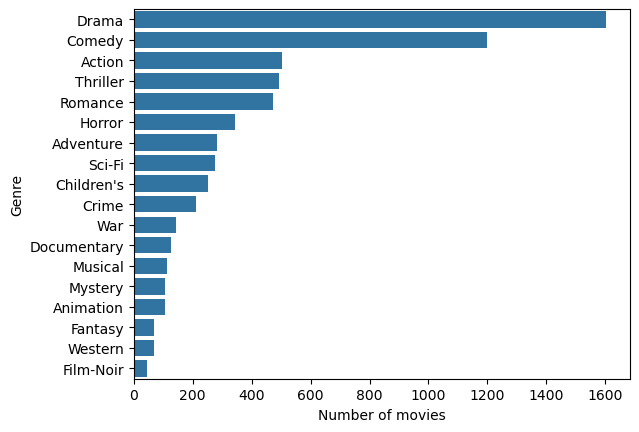

In [48]:
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index)
ax.set(xlabel="Number of movies", ylabel="Genre")


[Text(0.5, 0, 'Number of users'), Text(0, 0.5, 'Occupation')]

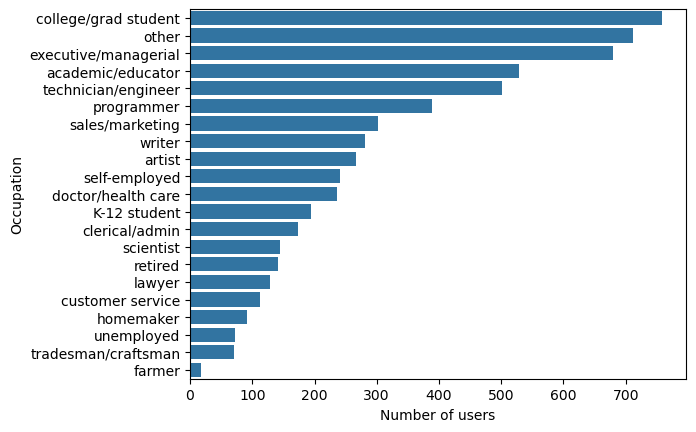

In [49]:
ax1 = sns.countplot(y='occupation_name', data=users, order=users['occupation_name'].value_counts().index)
ax1.set(xlabel="Number of users", ylabel="Occupation")

In [55]:
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [56]:
user_movie_dict = build_user_item_interactions(ratings, "userid", "movieid")

In [58]:
user_ratings = get_positive_negative_ratings(user_movie_dict, 3, 5)